# Examples on how to use `carculator`

Github: https://github.com/romainsacchi/carculator/

Publication:

*carculator: an open-source tool for prospective environmental and economic life cycle assessment of vehicles. When, Where and How can battery-electric vehicles help reduce greenhouse gas emissions?*

Romain Sacchi, Christian Bauer, Brian Cox, Christopher Mutel

Submitted to Renewable and Sustainable Energy Reviews (*in review*)

# Car model

Import the library

In [1]:
from carculator import *
import matplotlib.pyplot as plt

Load the default car parameters

In [3]:
cip = CarInputParameters()

Define the calculation mode: static or stochastic(number of iterations)
* `static`: the model use one value for each parameter: the most likely value
* `stochastic`: the model uses a range of values pseudo-randomly generated on the basis of a probability distribution. The number of values generated is given by the integer argument passed to `.stochastic()`

In [4]:
cip.static()

Fill-in the array that will be used to create the car models

In [5]:
dcts, array = fill_xarray_from_input_parameters(cip)

We can check the powertrains, sizes and yaers considered

In [6]:
list(array.powertrain.values)

['BEV',
 'FCEV',
 'HEV-d',
 'HEV-p',
 'ICEV-d',
 'ICEV-g',
 'ICEV-p',
 'PHEV-c-d',
 'PHEV-c-p',
 'PHEV-d',
 'PHEV-e',
 'PHEV-p']

2000, 2010, 2020, 2030, 2040 and 2050 are the default years

In [7]:
list(array.year.values)

[2000, 2010, 2020, 2030, 2040, 2050]

Or the size categories

In [8]:
list(array["size"].values)

['Large',
 'Large SUV',
 'Lower medium',
 'Medium',
 'Medium SUV',
 'Micro',
 'Mini',
 'Small',
 'Van']

It is possible to narrow down the scope if you are interested only in a few specific vehicles.
For example here, let's narrow it down to small and medium BEV and ICEV-ds.

In [9]:
scope = {
    "powertrain":["BEV", "ICEV-d"],
    "size":["Small", "Medium"]
}
dcts, array = fill_xarray_from_input_parameters(cip, scope=scope)
list(array.powertrain.values)

['BEV', 'ICEV-d']

It is possible to derive car models for other years by interpolating between 2017 and 2040 (or extrapolating beyond 2040 or before 2017). It is not advised to extrapolate beyond 2050 though.

In [10]:
array = array.interp(year=[2018, 2022, 2035, 2040, 2045, 2050],  kwargs={'fill_value': 'extrapolate'})

We can create now the car models, using the default parameters, while specifying a driving cycle

In [11]:
cm = CarModel(array, cycle='WLTC')

In [12]:
cm.set_all()

Let's print the engine efficiency of the medium size diesel vehicle.

In [13]:
cm.array.sel(powertrain="ICEV-d", year=2035, size="Medium", parameter="engine efficiency")

<xarray.DataArray (value: 1)>
array([0.30000001])
Coordinates:
    size        <U6 'Medium'
    powertrain  <U6 'ICEV-d'
    parameter   <U64 'engine efficiency'
  * value       (value) int64 0
    year        int64 2035

Let's search for all the efficiency parameters

In [14]:
params = [p for p in cm.array.coords["parameter"].values if "efficiency" in p]

In [15]:
cm.array.sel(parameter=params, value=0).to_dataframe("val").unstack()["val"]

year                                                2018      2022      2035  \
size   powertrain parameter                                                    
Small  BEV        TtW efficiency                0.680986  0.714743  0.745504   
                  battery charge efficiency     0.847330  0.852772  0.859978   
                  battery discharge efficiency  0.875043  0.882174  0.887826   
                  charger efficiency            1.000000  1.000000  1.000000   
                  engine efficiency             0.888391  0.897239  0.910239   
                  fuel cell stack efficiency    0.000000  0.000000  0.000000   
                  fuel cell system efficiency   0.000000  0.000000  0.000000   
                  recuperation efficiency       0.876000  0.903000  0.922500   
                  transmission efficiency       0.876000  0.903000  0.922500   
       ICEV-d     TtW efficiency                0.238344  0.243261  0.251739   
                  battery charge efficiency     0.847330  0.852772  0.859978   
                  battery discharge efficiency  0.875043  0.882174  0.887826   
                  charger efficiency            0.000000  0.000000  0.000000   
                  engine efficiency             0.296000  0.300000  0.300000   
                  fuel cell stack efficiency    0.000000  0.000000  0.000000   
                  fuel cell system efficiency   0.000000  0.000000  0.000000   
                  recuperation efficiency       1.000000  0.810870  0.839130   
                  transmission efficiency       0.805217  0.810870  0.839130   
Medium BEV        TtW efficiency                0.680986  0.714743  0.745504   
                  battery charge efficiency     0.847330  0.852772  0.859978   
                  battery discharge efficiency  0.875043  0.882174  0.887826   
                  charger efficiency            1.000000  1.000000  1.000000   
                  engine efficiency             0.888391  0.897239  0.910239   
                  fuel cell stack efficiency    0.000000  0.000000  0.000000   
                  fuel cell system efficiency   0.000000  0.000000  0.000000   
                  recuperation efficiency       0.876000  0.903000  0.922500   
                  transmission efficiency       0.876000  0.903000  0.922500   
       ICEV-d     TtW efficiency                0.238344  0.243261  0.251739   
                  battery charge efficiency     0.847330  0.852772  0.859978   
                  battery discharge efficiency  0.875043  0.882174  0.887826   
                  charger efficiency            0.000000  0.000000  0.000000   
                  engine efficiency             0.296000  0.300000  0.300000   
                  fuel cell stack efficiency    0.000000  0.000000  0.000000   
                  fuel cell system efficiency   0.000000  0.000000  0.000000   
                  recuperation efficiency       1.000000  0.810870  0.839130   
                  transmission efficiency       0.805217  0.810870  0.839130   

year                                                2040      2045      2050  
size   powertrain parameter                                                   
Small  BEV        TtW efficiency                0.757543  0.761682  0.765820  
                  battery charge efficiency     0.862750  0.862750  0.862750  
                  battery discharge efficiency  0.890000  0.890000  0.890000  
                  charger efficiency            1.000000  1.000000  1.000000  
                  engine efficiency             0.915239  0.920239  0.925239  
                  fuel cell stack efficiency    0.000000  0.000000  0.000000  
                  fuel cell system efficiency   0.000000  0.000000  0.000000  
                  recuperation efficiency       0.930000  0.930000  0.930000  
                  transmission efficiency       0.930000  0.930000  0.930000  
       ICEV-d     TtW efficiency                0.255000  0.255000  0.255000  
           

Alternatively, we can override specific parameters value.
For example, we can to lower the lifetime (expressed in kilometers) of the vehicles:

In [16]:
array.loc[dict(parameter="lifetime kilometers", powertrain="BEV")] = 150000
#modify_xarray_from_custom_parameters(dict_param, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

Let's now check the new lifetime value for the medium size diesel car.

In [17]:
cm.array.sel(powertrain='BEV', size='Medium', value=0, parameter='lifetime kilometers')

<xarray.DataArray (year: 6)>
array([150000., 150000., 150000., 150000., 150000., 150000.])
Coordinates:
    size        <U6 'Medium'
    powertrain  <U6 'BEV'
    parameter   <U64 'lifetime kilometers'
    value       int64 0
  * year        (year) int64 2018 2022 2035 2040 2045 2050

One can print the list of input and calculated parameters

In [18]:
cip.parameters

['1-Pentene direct emissions, rural',
 '1-Pentene direct emissions, suburban',
 '1-Pentene direct emissions, urban',
 'Acetaldehyde direct emissions, rural',
 'Acetaldehyde direct emissions, suburban',
 'Acetaldehyde direct emissions, urban',
 'Acetone direct emissions, rural',
 'Acetone direct emissions, suburban',
 'Acetone direct emissions, urban',
 'Acrolein direct emissions, rural',
 'Acrolein direct emissions, suburban',
 'Acrolein direct emissions, urban',
 'Ammonia direct emissions, rural',
 'Ammonia direct emissions, suburban',
 'Ammonia direct emissions, urban',
 'Arsenic direct emissions, rural',
 'Arsenic direct emissions, suburban',
 'Arsenic direct emissions, urban',
 'Benzaldehyde direct emissions, rural',
 'Benzaldehyde direct emissions, suburban',
 'Benzaldehyde direct emissions, urban',
 'Benzene direct emissions, rural',
 'Benzene direct emissions, suburban',
 'Benzene direct emissions, urban',
 'Butane direct emissions, rural',
 'Butane direct emissions, suburban',


We can also override **calculated** parameters. For example, the driving mass:

In [29]:
target = {
    ("BEV", "Small", 2020): 800 # kg
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', target_mass=target)
cm.set_all()

In [30]:
cm.array.sel(size="Small", powertrain="BEV", parameter="curb mass")

<xarray.DataArray (year: 6, value: 1)>
array([[1344.928 ],
       [1344.928 ],
       [ 800.    ],
       [1288.0297],
       [1275.6812],
       [1275.6812]], dtype=float32)
Coordinates:
    size        <U12 'Small'
    powertrain  <U8 'BEV'
    parameter   <U64 'curb mass'
  * year        (year) int64 2000 2010 2020 2030 2040 2050
  * value       (value) int64 0

As explained in the documentation, the `curb mass` is not the `driving mass`, since the `driving mass` include the passengers' mass as well as the cargo mass.

In [31]:
cm.array.sel(size="Small", powertrain="BEV", parameter="driving mass")

<xarray.DataArray (year: 6, value: 1)>
array([[1484.928 ],
       [1484.928 ],
       [ 940.    ],
       [1428.0297],
       [1415.6812],
       [1415.6812]], dtype=float32)
Coordinates:
    size        <U12 'Small'
    powertrain  <U8 'BEV'
    parameter   <U64 'driving mass'
  * year        (year) int64 2000 2010 2020 2030 2040 2050
  * value       (value) int64 0

Another calculated parameter we can override is the battery capacity.

In [38]:
batt_cap = {
    ("BEV", "Small", 2020): 50 # kWh
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', energy_storage={"capacity": batt_cap, "origin": "FR"}) # <- here we also set the battery manufacture location
cm.set_all()

In [33]:
cm.array.sel(size="Small", powertrain="BEV", parameter="electric energy stored", year=2020)

<xarray.DataArray (value: 1)>
array([50.], dtype=float32)
Coordinates:
    size        <U12 'Small'
    powertrain  <U8 'BEV'
    parameter   <U64 'electric energy stored'
    year        int64 2020
  * value       (value) int64 0

We can also set the battery chemistry (which have different cell energy densities).

In [40]:
batt_chem = {
    ("BEV", "Small", 2020): "NMC-111", # 0.2 kWh/kg in 2020
    ("BEV", "Medium", 2020): "LFP", # 0.15 Wh/kg in 2020
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', energy_storage={"electric": batt_chem})
cm.set_all()

In [43]:
cm.array.sel(size=["Small", "Medium"], powertrain="BEV", parameter="battery cell energy density", year=2020)

<xarray.DataArray (size: 2, value: 1)>
array([[0.2 ],
       [0.15]], dtype=float32)
Coordinates:
  * size        (size) <U12 'Small' 'Medium'
    powertrain  <U8 'BEV'
    parameter   <U64 'battery cell energy density'
    year        int64 2020
  * value       (value) int64 0

Note that you can also directly modify the cell energy density. You need to do that before calling `.set_all()`.

In [45]:
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')

cm.array.loc[dict(powertrain="BEV", year=2020, parameter="battery cell energy density")] = 0.3

cm.set_all()

In [46]:
cm.array.sel(size=["Small", "Medium"], powertrain="BEV", parameter="battery cell energy density", year=2020)

<xarray.DataArray (size: 2, value: 1)>
array([[0.3],
       [0.3]], dtype=float32)
Coordinates:
  * size        (size) <U12 'Small' 'Medium'
    powertrain  <U8 'BEV'
    parameter   <U64 'battery cell energy density'
    year        int64 2020
  * value       (value) int64 0

We can also override the energy consumption.

In [35]:
ttw_energy = {
    ("ICEV-p", "Small", 2020): 1500, # kj/km
    ("BEV", "Small", 2020): 900 # kj/km
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', energy_consumption=ttw_energy)
cm.set_all()

Overriding TtW energy for ICEV-p Small 2020 with 1500 kj/km
Overriding TtW energy for BEV Small 2020 with 900 kj/km


In [36]:
cm.array.sel(size="Small", powertrain=["BEV", "ICEV-p"], parameter="TtW energy", year=2020)

<xarray.DataArray (powertrain: 2, value: 1)>
array([[ 900.],
       [1500.]], dtype=float32)
Coordinates:
    size        <U12 'Small'
  * powertrain  (powertrain) <U8 'BEV' 'ICEV-p'
    parameter   <U64 'TtW energy'
    year        int64 2020
  * value       (value) int64 0

Also, among the calculated parameters one can modifiy, there's the engine power.

In [47]:
power = {
    ("ICEV-p", "Small", 2020): 90, # kW
    ("BEV", "Small", 2020): 50 # kW
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', power=power)
cm.set_all()

In [48]:
cm.array.sel(size="Small", powertrain=["BEV", "ICEV-p"], parameter="power", year=2020)

<xarray.DataArray (powertrain: 2, value: 1)>
array([[50.],
       [90.]], dtype=float32)
Coordinates:
    size        <U12 'Small'
  * powertrain  (powertrain) <U8 'BEV' 'ICEV-p'
    parameter   <U64 'power'
    year        int64 2020
  * value       (value) int64 0

Finlly, one can also override the `range` of the battery electric vehicles (not the ICEVs).

In [2]:
range_km = {
    ("BEV", "Small", 2020): 150, # km
}

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC', target_range=range_km)
cm.set_all()

In [4]:
cm.array.sel(size="Small", powertrain=["BEV"], parameter="range", year=2020)

<xarray.DataArray (powertrain: 1, value: 1)>
array([[150.]], dtype=float32)
Coordinates:
    size        <U12 'Small'
  * powertrain  (powertrain) <U8 'BEV'
    parameter   <U64 'range'
    year        int64 2020
  * value       (value) int64 0

There are other options accessible via the CarModel class, such as setting an electric utility factor for PHEVs, setting a fuel blend, etc.
You can have an overview by doing:

In [5]:
CarModel?

Init signature:
CarModel(
    array: xarray.core.dataarray.DataArray,
    country='CH',
    cycle: Union[NoneType, str, numpy.ndarray] = None,
    gradient: Optional[numpy.ndarray] = None,
    energy_storage: Optional[Dict] = None,
    electric_utility_factor: float = None,
    drop_hybrids: bool = True,
    payload=None,
    energy_target=None,
    energy_consumption: dict = None,
    target_range: dict = None,
    target_mass: dict = None,
    power: dict = None,
    fuel_blend: dict = None,
) -> None
Docstring:     
This class represents the entirety of the vehicles considered, with useful attributes, such as an array that stores
all the vehicles parameters.

:ivar array: multi-dimensional numpy-like array that contains parameters' value(s)
:ivar cycle: name of a driving cycle, or custom driving cycle
:ivar gradient: series of gradients, for each second of the driving cycle
:ivar energy_storage: dictionary with selection of battery chemistry for each powertrain
Init docstring:
:para

## Driving cycles

### Standard driving cycles

We can also change the driving cycle, among those offered:
* WLTC
* WLTC 3.1
* WLTC 3.2
* WLTC 3.3
* WLTC 3.4
* CADC Urban
* CADC Road
* CADC Motorway
* CADC Motorway 130
* CADC
* NEDC

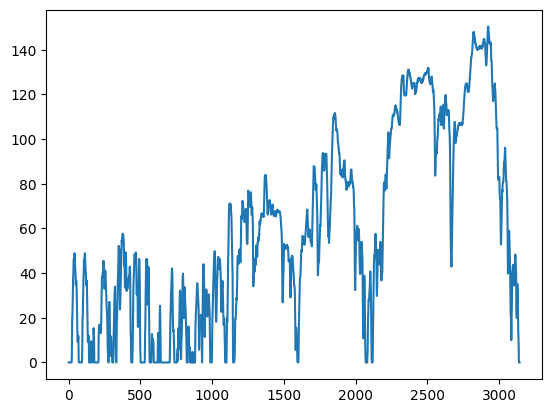

In [5]:
from carculator import get_standard_driving_cycle_and_gradient
import matplotlib.pyplot as plt
import numpy as np

# the speed profile
plt.plot(get_standard_driving_cycle_and_gradient(name="CADC", vehicle_type="car", vehicle_sizes="Small")[0])

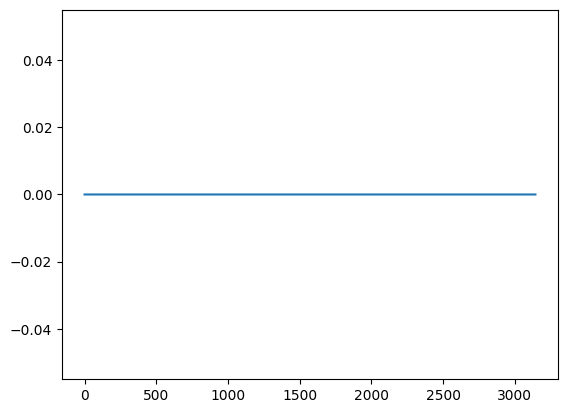

In [6]:
# the gradient (null, in this case)
plt.plot(get_standard_driving_cycle_and_gradient(name="CADC", vehicle_type="car", vehicle_sizes="Small")[1])

You can specify the driving cycle and associated gradient directly in CarModel.

In [1]:
from carculator import *
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='CADC')
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Medium', value=0, parameter='fuel consumption') * 100 # in L/km x 100 km

<xarray.DataArray (year: 6)>
array([9.154113 , 7.935769 , 6.9034395, 6.2614865, 5.689863 , 5.6707926],
      dtype=float32)
Coordinates:
    size        <U12 'Medium'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'fuel consumption'
  * year        (year) int64 2000 2010 2020 2030 2040 2050
    value       int64 0

### User-provided driving cycles

Or even add our own driving cycle. Let's make a random one, as a numpy array or list.

Text(0.5, 0, 'second of driving')

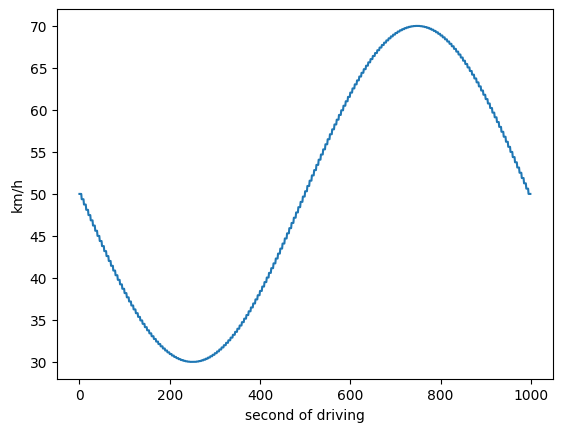

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from carculator import *
x = np.linspace(-np.pi, np.pi, 200)
cycle = np.sin(x)*20 + 50
cycle = np.repeat(cycle, 5)
plt.plot(np.arange(0,1000), cycle)

plt.ylabel('km/h')
plt.xlabel('second of driving')

And then pass it to `CarModel` and recalculate the tank-to-wheel energy.

In [2]:
from carculator import *
cip = CarInputParameters()
cip.static()
_, array = fill_xarray_from_input_parameters(cip, scope={"size":["Medium", "Medium SUV"], "year":[2000, 2010, 2020]})
cm = CarModel(array, cycle=cycle)
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Medium', value=0, parameter='TtW energy')

<xarray.DataArray (year: 3)>
array([1713.0431, 1385.7104, 1152.7952], dtype=float32)
Coordinates:
    size        <U10 'Medium'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'TtW energy'
  * year        (year) int64 2000 2010 2020
    value       int64 0

### Road gradients

We can add road gradients during a driving cycle. For example, let's say the road is going up by 4% for the first half, and down by 2% for the second half.

In [3]:
velocity = (cycle * 1000) / 3600 # go from km/h to m/s

x = np.array([.04,-.02])
z = np.repeat(x, (velocity.shape[0]/2))
# We have our z vectorm which has the same size as the driving cycle we previously made up.
z.shape

(1000,)

We get the following elevation profile. Teh car ends up more or less at the same altitude it started at.

Text(0.5, 0, 's')

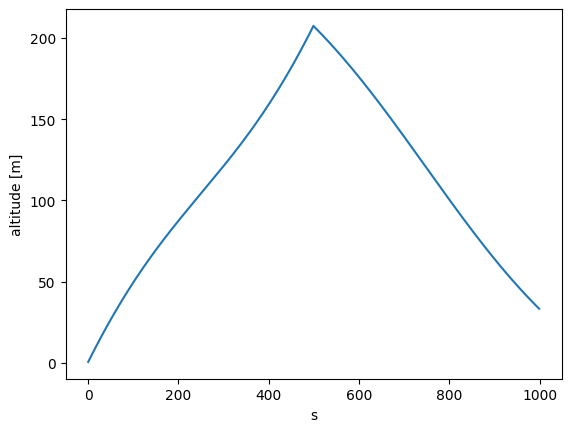

In [4]:
altitude = velocity * z
plt.plot(altitude.cumsum())
plt.ylabel("altitude [m]")
plt.xlabel("s")

We can pass this gradient vector to `CarModel` and recalculate the tank-to-wheel energy.

In [5]:
cm = CarModel(array, cycle=cycle, gradient=z)
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Medium', value=0, parameter='TtW energy')

<xarray.DataArray (year: 3)>
array([2182.721 , 1773.5142, 1490.6047], dtype=float32)
Coordinates:
    size        <U10 'Medium'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'TtW energy'
  * year        (year) int64 2000 2010 2020
    value       int64 0

We can plot any attributes of the car models. For example here, the tank to wheel energy of all electric cars in 2020.

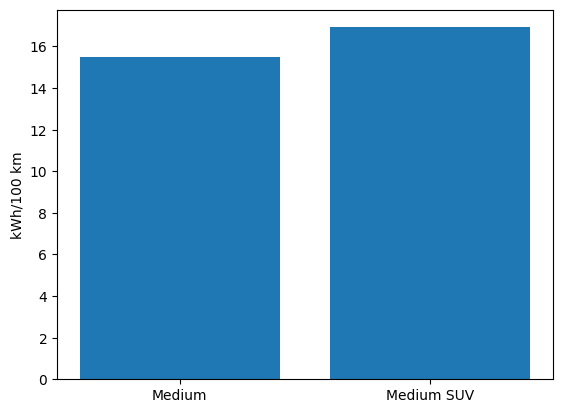

In [6]:
TtW_energy = cm.array.sel(powertrain='BEV', year=2020, parameter='electricity consumption', value=0) * 100
labels = cm.array.coords["size"].values.tolist()

plt.bar(labels, TtW_energy)
plt.ylabel('kWh/100 km')
plt.show()

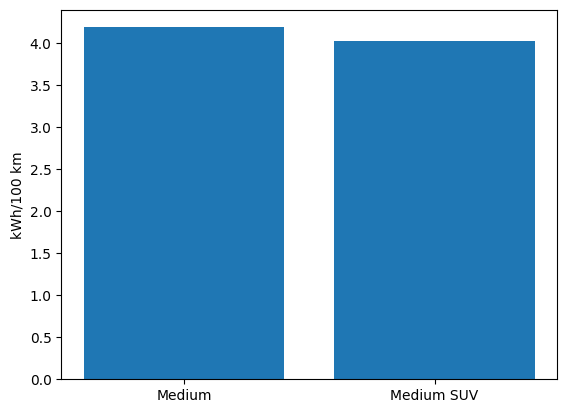

In [7]:
TtW_energy = cm.array.sel(powertrain='ICEV-d', year=2020, parameter='fuel consumption', value=0) * 100
labels = cm.array.coords["size"].values.tolist()

plt.bar(labels, TtW_energy)
plt.ylabel('kWh/100 km')
plt.show()

Or plot the energy consumption second by second

Text(0, 0.5, 'kj/s')

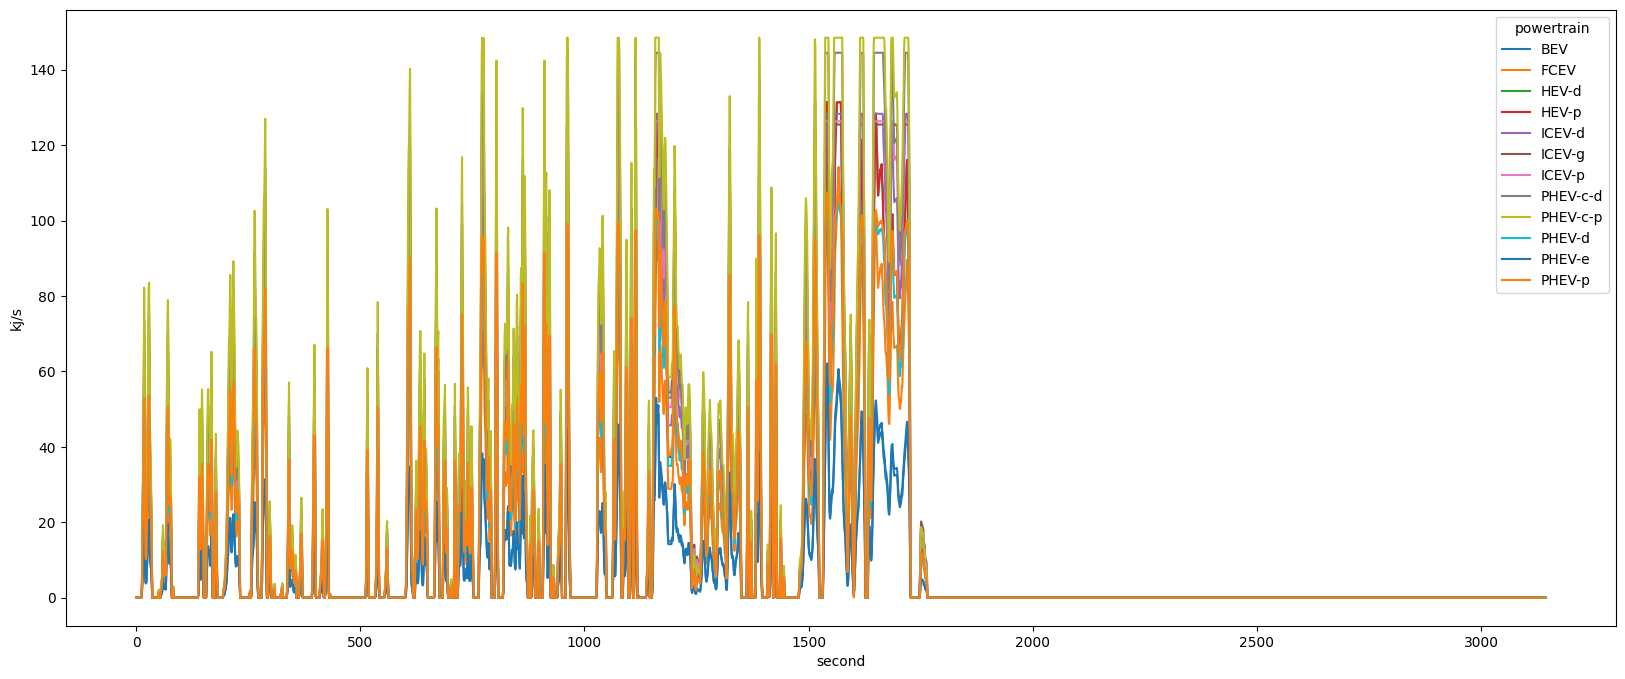

In [8]:
cm = CarModel(array, cycle="WLTC")
cm.set_all()

cm.energy.sel(parameter="motive energy", year=2020, size="Medium", value=0).to_dataframe("val")\
    .unstack()["val"].plot(figsize=(20, 8))
plt.ylabel("kj/s")

The same can be done considering uncertainties in input parameters

In [9]:
cip = CarInputParameters()
# 1000 iterations
cip.stochastic(1000)
dcts, array = fill_xarray_from_input_parameters(cip, scope={"powertrain":["ICEV-d", "BEV"], "size":["Large"], "year":[2020]})
cm = CarModel(array, cycle='WLTC')
cm.set_all()


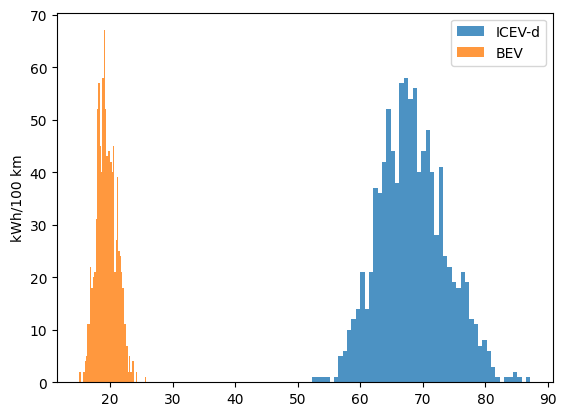

In [10]:
TtW_energy = cm.array.sel(size='Large', year=2020, parameter='TtW energy') * 1/3600 * 100

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.ylabel('kWh/100 km')
plt.legend()

Or in terms of km/L of petrol-equivalent

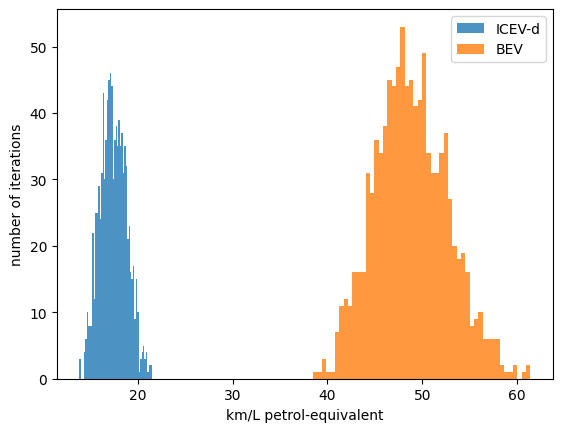

In [11]:
cip = CarInputParameters()
cip.stochastic(1000)

dcts, array = fill_xarray_from_input_parameters(cip,
                                                scope={"powertrain":["ICEV-d", "BEV"],
                                                       "size":["Lower medium"],
                                                       "year":[2020]})
#dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC 3.4')
cm.set_all()
TtW_energy = 1 / (cm.array.sel(size='Lower medium', year=2020, parameter='TtW energy') / 36000) # assuming 36 MJ/L petrol

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.xlabel('km/L petrol-equivalent')
plt.ylabel('number of iterations')
plt.legend()

We can check the randomly generated values for any parameter like so. Here, for the TtW efficiency [0-1].

In [13]:
cm.array.sel(size='Lower medium', year=2020, parameter='TtW efficiency')

<xarray.DataArray (powertrain: 2, value: 1000)>
array([[0.22371204, 0.21446867, 0.24165882, ..., 0.27586251, 0.25030017,
        0.26611918],
       [0.7236251 , 0.68275416, 0.6527169 , ..., 0.69654995, 0.6679558 ,
        0.66665614]], dtype=float32)
Coordinates:
    size        <U12 'Lower medium'
  * powertrain  (powertrain) <U6 'ICEV-d' 'BEV'
    parameter   <U64 'TtW efficiency'
    year        int64 2020
  * value       (value) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

We can look at noise emissions. We see that most noise is emitted in rural environment. Noise emissions are dependent of the driving cycle chosen.

Text(0, 0.5, 'joules per km')

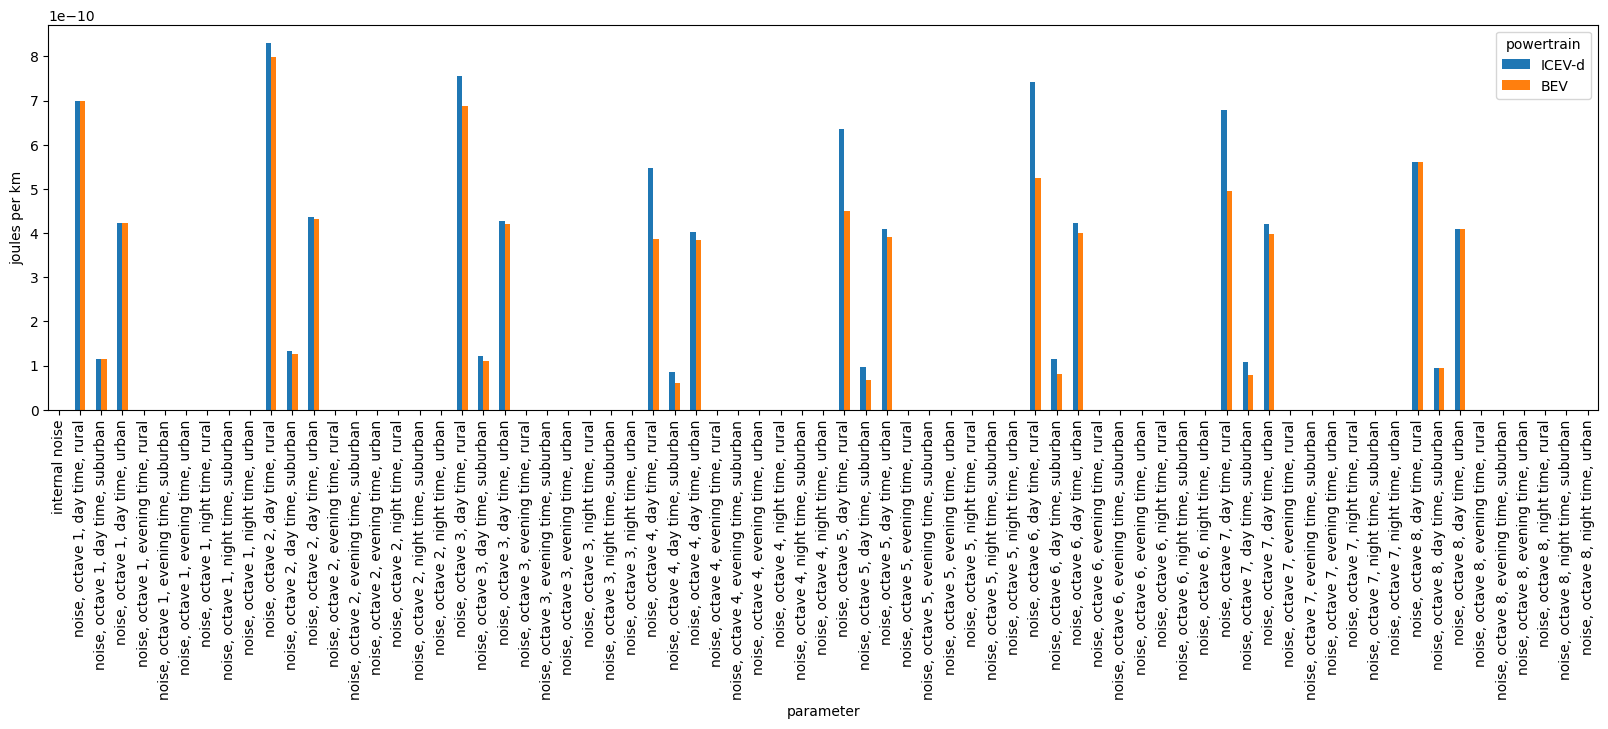

In [14]:
list_param = list(cm.array.parameter.values)
noise_emissions = [x for x in list_param if 'noise' in x]
data = cm.array.sel(parameter=noise_emissions, year=2020, size='Lower medium', value=0)\
    .to_dataframe(name='noise emissions').unstack()['noise emissions'].T
data[data>0].plot(kind='bar', figsize=(20, 5))
plt.ylabel('joules per km')

Calculation of the inventories

In [16]:
ic = InventoryCar(cm)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2020, % of renewable: 78.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 5.0%
 * *********************************************************************


We can have a look at the underlying technology matrix

In [17]:
ic.A.shape

(1000, 1303, 1303)

The labels of its rows and columns

In [ ]:
list(ic.inputs.keys())

# Impact assessment

For now, only Recipe 2008 (midpoint and endpoint indicators) and ILCD (only midpoint indicators) methods are present. LCIA scores can be obtained this way:

In [1]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

With ReCiPe 2008, midpoint indicators. Not all vehicles are characterized, as some powertrain technologies are not available prior to 2010 (HEVs) or 2020 (PHEV, BEV).

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2000, % of renewable: 60.0.
 	 * in 2010, % of renewable: 68.0.
 	 * in 2020, % of renewable: 77.0.
 	 * in 2030, % of renewable: 85.0.
 	 * in 2040, % of renewable: 88.0.
 	 * in 2050, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2020 _______

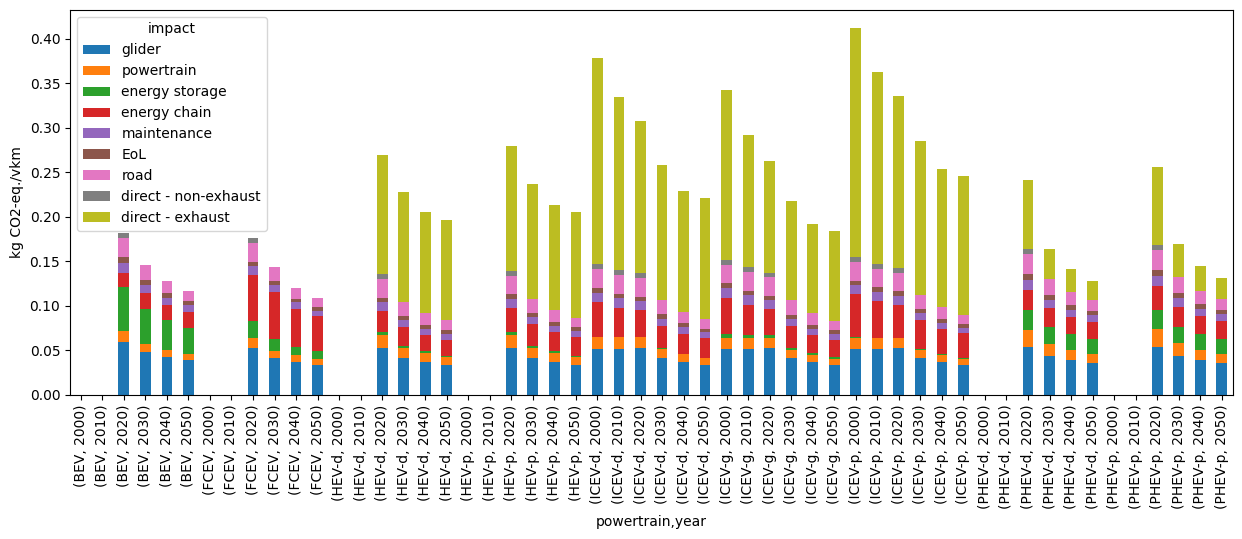

In [22]:
ic = InventoryCar(cm) # If the argument `method` is left unspecified, ReCiPe is used. It can also be specified epxlicitly.
# if `indicator` is left unspecified, midpoint indicators are use. Otherwise, specifiy endpoint.
results = ic.calculate_impacts()

results.sel(impact_category='climate change', size='Large', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(15, 5))
plt.ylabel('kg CO2-eq./vkm')
plt.show()

To get a list of available midpoint indicators with their details

In [24]:
ic.impact_categories

{'agricultural land occupation': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'agricultural land occupation',
  'type': 'midpoint',
  'abbreviation': 'ALOP',
  'unit': 'square meter-year',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'ozone depletion': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'ozone depletion',
  'type': 'midpoint',
  'abbreviation': 'ODPinf',
  'unit': 'kg CFC-11.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'climate change': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'climate change',
  'type': 'midpoint',
  'abbreviation': 'GWP100',
  'unit': 'kg CO2-Eq.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'terrestrial acidification': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'terrestrial acidification',
  'type': 'midpoint',
  'abbreviation': 'TAP100',
  'unit': 'kg SO2-Eq.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'photochemical oxidant formati

Or just a simple list of names

In [25]:
list(ic.impact_categories.keys())

['agricultural land occupation',
 'ozone depletion',
 'climate change',
 'terrestrial acidification',
 'photochemical oxidant formation',
 'metal depletion',
 'water depletion',
 'freshwater ecotoxicity',
 'human toxicity',
 'urban land occupation',
 'particulate matter formation',
 'freshwater eutrophication',
 'natural land transformation',
 'marine eutrophication',
 'terrestrial ecotoxicity',
 'fossil depletion',
 'ionising radiation',
 'marine ecotoxicity',
 'climate change, incl. biogenic CO2',
 'noise emissions',
 'renewable primary energy',
 'non-renewable primary energy']

With ReCiPe 2008, endpoint indicators

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2000, % of renewable: 60.0.
 	 * in 2010, % of renewable: 68.0.
 	 * in 2020, % of renewable: 77.0.
 	 * in 2030, % of renewable: 85.0.
 	 * in 2040, % of renewable: 88.0.
 	 * in 2050, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2020 _______

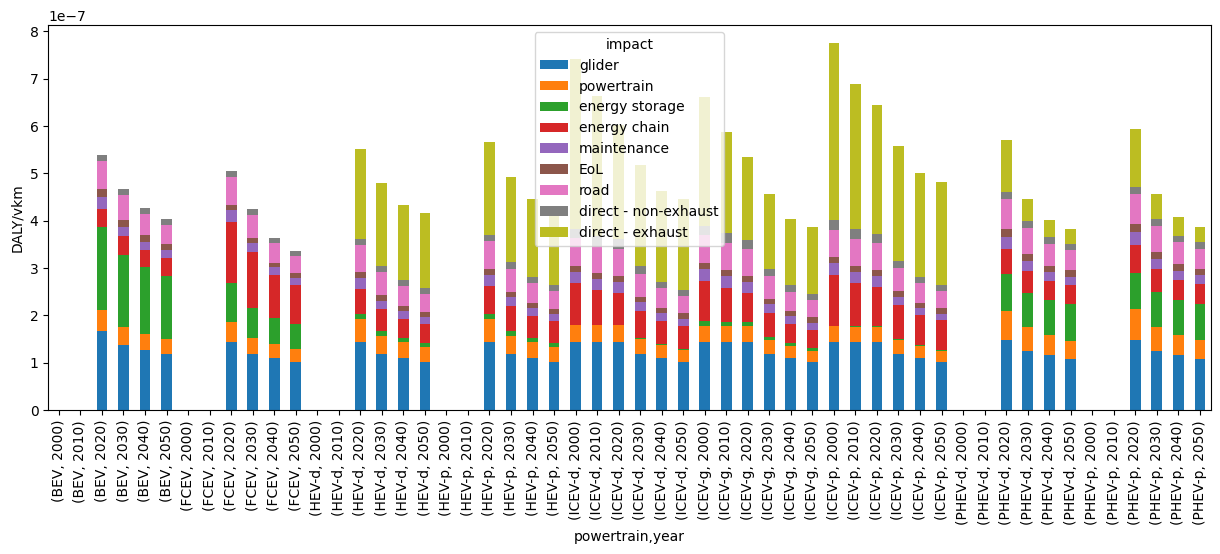

In [25]:
ic = InventoryCar(cm, method="recipe", indicator="endpoint") # <-- this changed!
results = ic.calculate_impacts()

results.sel(impact_category='Human health', size='Large', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(15, 5))
plt.ylabel('DALY/vkm')
plt.show()

With ILCD 2018

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2000, % of renewable: 60.0.
 	 * in 2010, % of renewable: 68.0.
 	 * in 2020, % of renewable: 77.0.
 	 * in 2030, % of renewable: 85.0.
 	 * in 2040, % of renewable: 88.0.
 	 * in 2050, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2020 _______

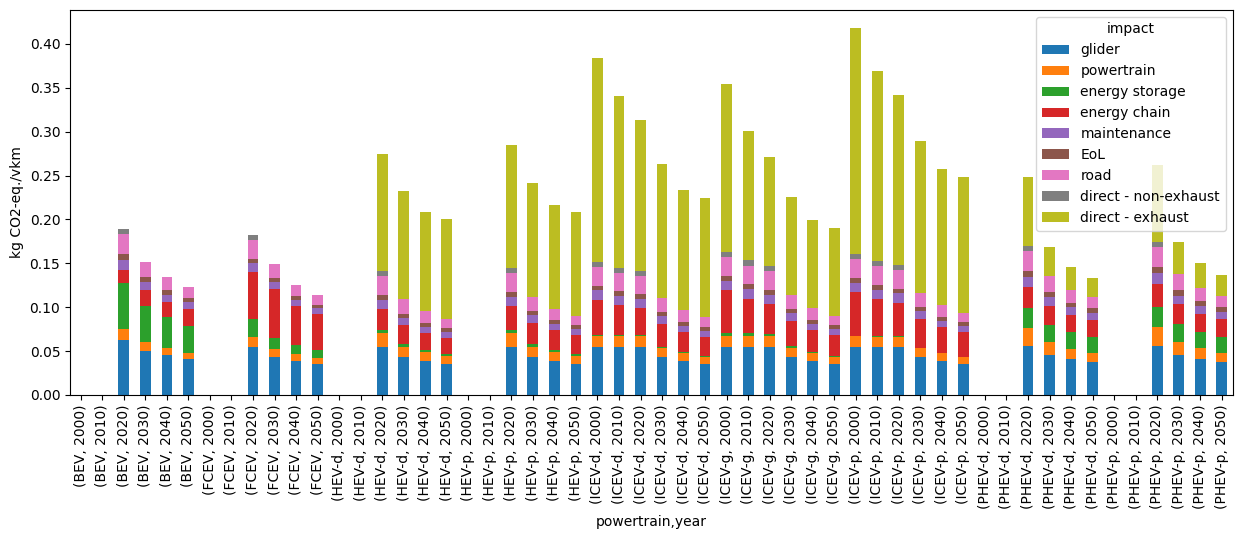

In [28]:
ic = InventoryCar(cm, method="ilcd") # Here, ILCD is specified.
results = ic.calculate_impacts()

results.sel(impact_category='climate change - climate change total', size='Large', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(15, 5))
plt.ylabel('kg CO2-eq./vkm')
plt.show()

## Integrated Assessment Model (IAM) 

Scenario outputs of IAM are used to modify the background inventories used to calculate the impacts of the vehicles, to reflect future expected changes in the energy-intensive sectors.

Currently, carculator uses scenario outputs of the IAM called REMIND, developed by PIK.

The outputs of the REMIND scenarios are used to modify the way electricity will be produced in the future as well as its supply markets for different work regions, but also other industrial sectors (cement, stell, heat, chemicals, etc.). The choice of scenario will also change the suggested fuel blands for different fuels, unless they are overridden by the user.

By default, when performing the impact assessment of vehicles, carculator uses REMIND-modified background inventories corresponding to the year of production of the vehicles, for a given energy scenario.

Three energy scenario are offered:
* SSP2-Baseline": business-as-usual, no climate policy is enforced, leading to a global temperature rise of 3.5 degrees Celsius by 2100,
* "SSP2-PkBudg1150": limits cumulative GHG emissions to 1,150 gigatons by 2100, leading to a global temperature rise well-below 2 degrees Celsius by 2100,
* "SSP2-PkBudg500": limits cumulative GHG emissions to 500 gigatons by 2100, limiting the global temperature increase to 1.5 degrees Celsius by 2100,
* "static": no forward-looking modification of the background inventories is done.

The scenario chosen should be passed as an argument to `InventoryCalculation()`. By default, "SSP2-Baseline" is chosen.

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2000, % of renewable: 60.0.
 	 * in 2010, % of renewable: 68.0.
 	 * in 2020, % of renewable: 77.0.
 	 * in 2030, % of renewable: 85.0.
 	 * in 2040, % of renewable: 88.0.
 	 * in 2050, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2020 _______

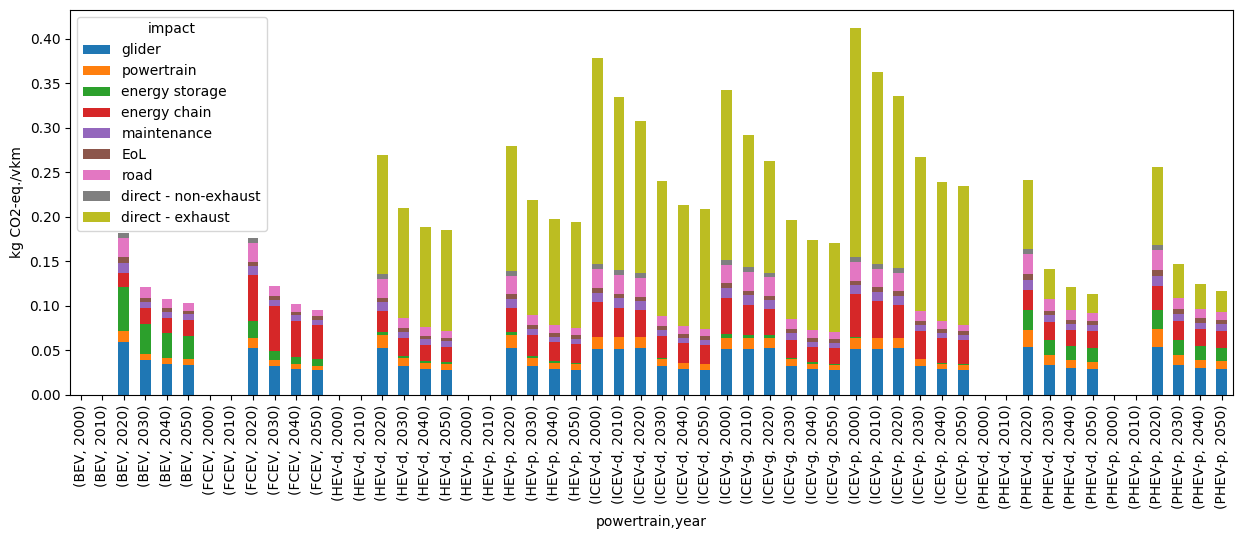

In [32]:
ic = InventoryCar(cm, scenario="SSP2-PkBudg500")
results = ic.calculate_impacts()
results.sel(impact_category='climate change', size='Large', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(15, 5))
plt.ylabel('kg CO2-eq./vkm')
plt.show()

You can also exclude any background transofrmation, by specifying `static` instead.

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
in 2000, % of renewable: 60.0.
 	 * in 2010, % of renewable: 68.0.
 	 * in 2020, % of renewable: 77.0.
 	 * in 2030, % of renewable: 85.0.
 	 * in 2040, % of renewable: 88.0.
 	 * in 2050, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 10.0%
 	 * in 2010 _________________________________________ 20.0%
 	 * in 2020 _______

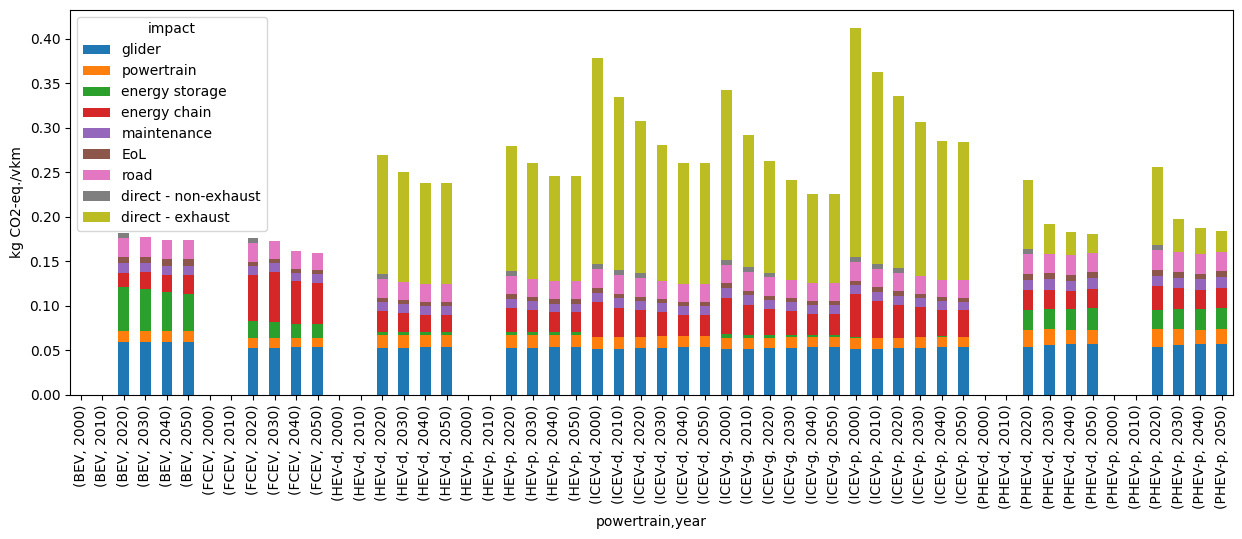

In [2]:
ic = InventoryCar(cm, scenario="static")
results = ic.calculate_impacts()
results.sel(impact_category='climate change', size='Large', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(15, 5))
plt.ylabel('kg CO2-eq./vkm')
plt.show()

## Monte Carlo analysis

The calling of functions does not change, except that we call `cip.stochastic()` instead of `cip.static()`. For example here, we do a Monte Carlo analysis with 500 iterations, for Large BEVs and PHEV-d only. BUt we will specify the scope earlier, to limit memory usage.

In [1]:
from carculator import *
import matplotlib.pyplot as plt

In [2]:
scope = {
    'powertrain':['BEV', 'PHEV-d'],
    'size':['Large']
}


cip = CarInputParameters()
cip.stochastic(50)

dcts, array = fill_xarray_from_input_parameters(cip, scope=scope) # <-- we specify the scope here
cm = CarModel(array, cycle='WLTC')
cm.set_all()

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2000 and 2018, % of renewable: 60.0.
 	 * between 2010 and 2028, % of renewable: 68.0.
 	 * between 2020 and 2038, % of renewable: 78.0.
 	 * between 2030 and 2048, % of renewable: 86.0.
 	 * between 2040 and 2058, % of renewable: 88.0.
 	 * between 2050 and 2068, % of renewable: 87.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 5.0%
 	 * in 2030 _________________________________________ 5.0%
 	 * in 2040 _________________________________________ 5.0%
 	 * in 2050 _________________________________________ 5.0%
 * *********************************************************************


Text(0, 0.5, 'kg CO2-eq./vkm')

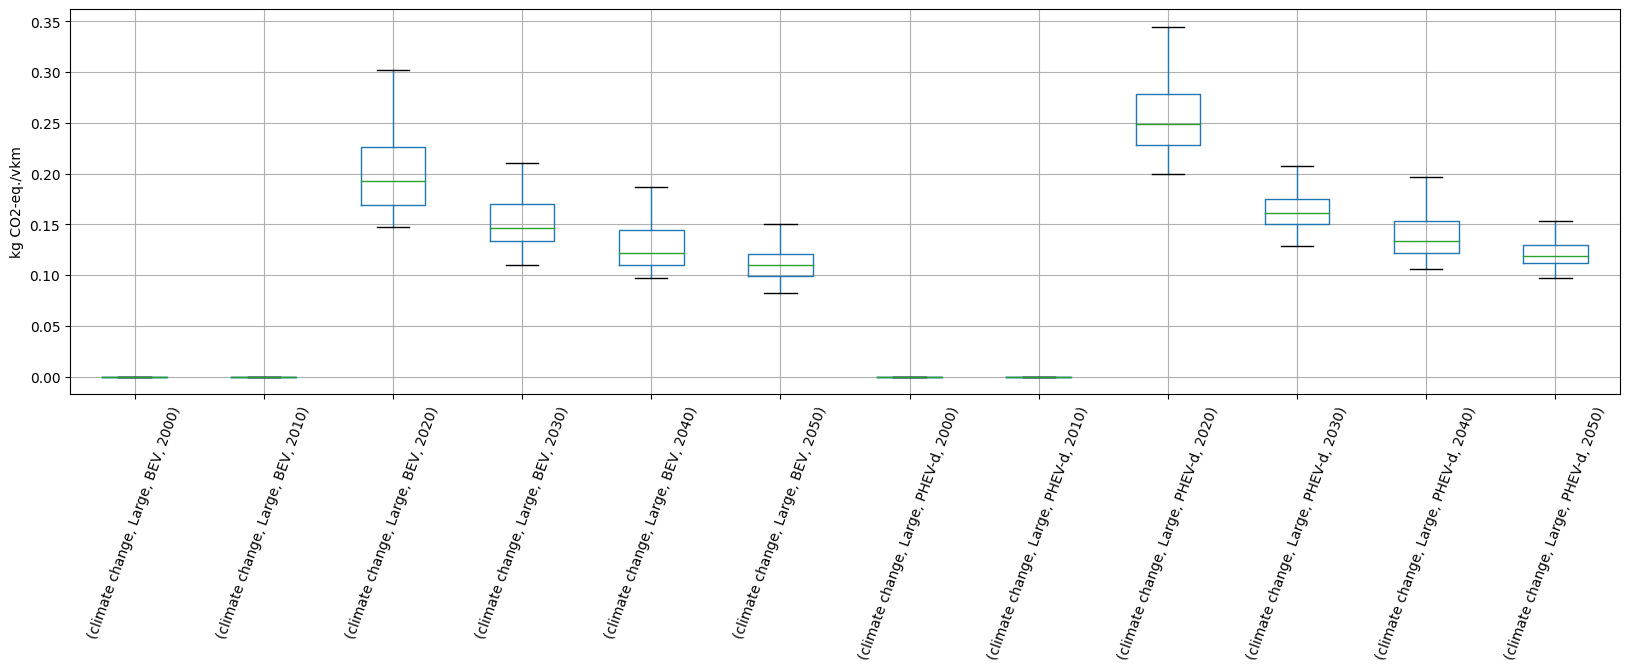

In [3]:
ic = InventoryCar(cm)

results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')

data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

## Background assumptions

We can specify a number of different background assumptions such as:
* the electricity mix to be used during the Use phase (i.e., battery chanrging, hydrogen production, etc.)
* fuels pathways (bioethanol instead of gasoline, hydrogen from steam methane reforming instead of electrolysis, synthetic fuels)
* the blend for different fuels (e.g., % of biodiesel vs. % of conventional diesel)
* the energy storage technologies (e.g., different battery chemistries: NMC, LFP, NCA, etc.)
* ...

For example, we wish to charge BEV batteries with German electricity

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is DE.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2000 and 2018, % of renewable: 17.0.
 	 * between 2010 and 2028, % of renewable: 40.0.
 	 * between 2020 and 2038, % of renewable: 67.0.
 	 * between 2030 and 2048, % of renewable: 82.0.
 	 * between 2040 and 2058, % of renewable: 85.0.
 	 * between 2050 and 2068, % of renewable: 85.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 5.0%
 	 * in 2030 _________________________________________ 5.0%
 	 * in 2040 _________________________________________ 5.0%
 	 * in 2050 _________________________________________ 5.0%
 * *********************************************************************


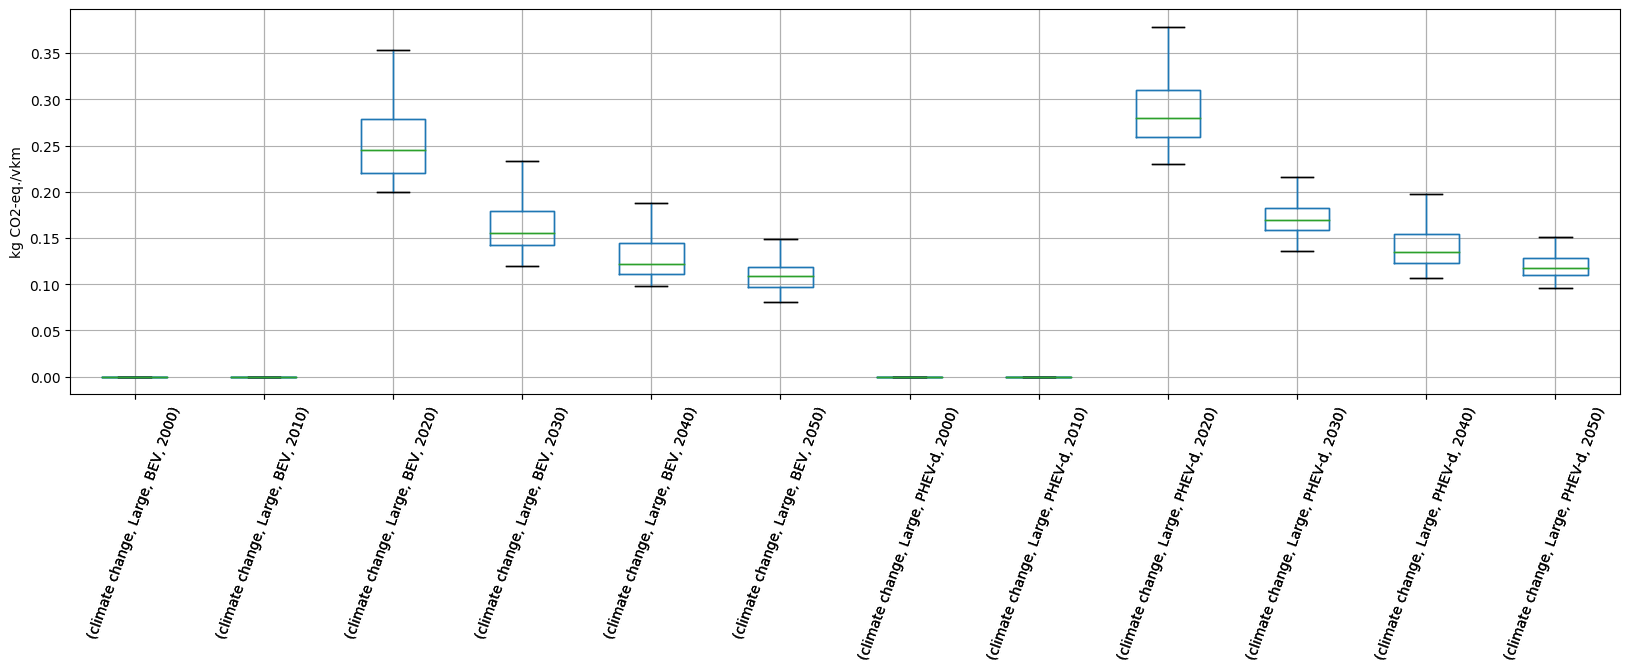

In [5]:
cm.country = "DE"

ic = InventoryCar(cm)

results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')

data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

Or with a specific electricity mix in mind...

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is DE.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2000 and 2018, % of renewable: 50.0.
 	 * between 2010 and 2028, % of renewable: 50.0.
 	 * between 2020 and 2038, % of renewable: 50.0.
 	 * between 2030 and 2048, % of renewable: 50.0.
 	 * between 2040 and 2058, % of renewable: 50.0.
 	 * between 2050 and 2068, % of renewable: 10.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 5.0%
 	 * in 2030 _________________________________________ 5.0%
 	 * in 2040 _________________________________________ 5.0%
 	 * in 2050 _________________________________________ 5.0%
 * *********************************************************************


/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_54749/2497407928.py:40: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


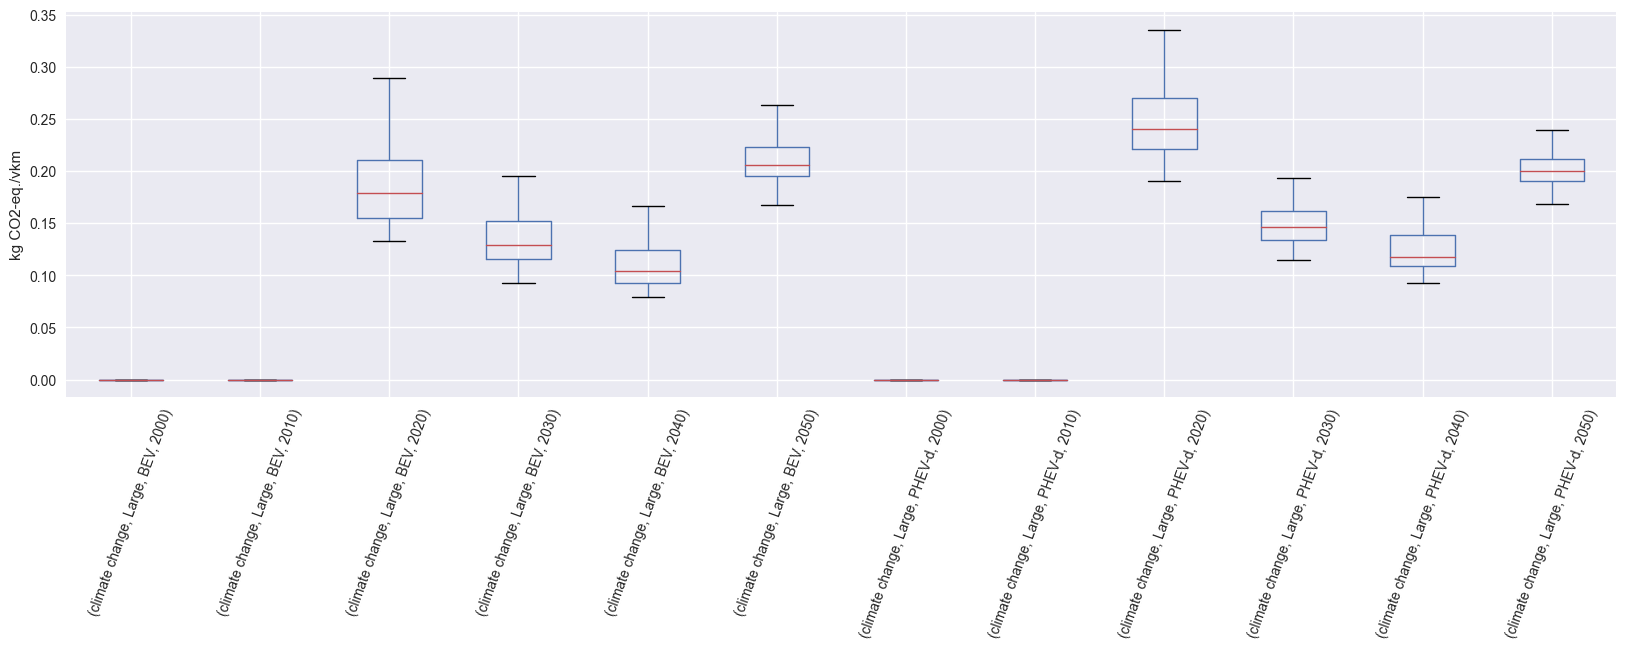

In [9]:
scope = {
    'powertrain':['BEV', 'PHEV-d'],
}

"""
- [0]: hydro-power
- [1]: nuclear
- [2]: natural gas
- [3]: solar power
- [4]: wind power
- [5]: biomass
- [6]: coal
- [7]: oil
- [8]: geothermal
- [9]: waste incineration
- [10]: biomass with CCS
- [11]: biogas with CCS
- [12]: coal with CCS
- [13]: natural gas with CCS
- [14]: wood with CCS
- [15]: hydro power, reservoir
- [16]: Gas ICCGT
- [17]: Gas CHP
- [18]: Solar, thermal
- [19]: Wind, offshore
- [20]: Lignite
"""
background_configuration = {
    'custom electricity mix' : [[.5,.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], # in this case, 50% hydro, 50% nuclear
                                [.5,.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                [.5,.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                [.5,.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                [.5,.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                [0.1,0,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # in this case, 10% hydro, 90% nat. gas
                               ] 
}
ic = InventoryCar(cm, background_configuration = background_configuration)
results = ic.calculate_impacts()

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

We can also change the fuel pathways for different fuels or blend them:
* diesel: conventional, biodiesel, synthetic diesel
* petrol: conventional, bio-ethanol, synthetic gasoline
* gas: conventional, bio-methane, synthetic methane
* hydrogen: electrolysis, steam methane reforming of biogas, steam methane reforming of natural gas, from coal-gasification, etc.
* electricity: country mix or custom mix

**Note that not all fuels have the same lower heating value. Hence, the range of the vehicles will be adjusted to the blend specified.**

As well as choose from a few technologies for energy storage:
* battery: LFP, NMC or NCA chemistries
* battery: country of manufacture
* hydrogen tanks: carbon fiber, hdpe liner, aluminium liner.


And to get the fuel blend used for the current calculation, do so:

In [12]:
cm.fuel_blend

{'diesel': {'primary': {'type': 'diesel',
   'share': array([1.        , 0.99610285, 0.95192482, 0.95192482, 0.95192482,
          0.95192482]),
   'lhv': 43,
   'CO2': 3.15,
   'density': 0.83,
   'name': ('diesel production, low-sulfur, petroleum refinery operation',
    'Europe without Switzerland',
    'kilogram',
    'diesel, low-sulfur'),
   'biogenic share': 0},
  'secondary': {'type': 'biodiesel - cooking oil',
   'share': array([0.        , 0.00389715, 0.04807518, 0.04807518, 0.04807518,
          0.04807518]),
   'lhv': 38,
   'CO2': 2.79,
   'density': 0.88,
   'name': ('Biodiesel, from used cooking oil, at fuelling station',
    'RER',
    'kilogram',
    'biodiesel, vehicle grade'),
   'biogenic share': 1}}}

In this case, the diesel vehicle from above (PHEV-d) is using 99.6% conventional diesel the first year, but only 92% the last year, as it is completed by biodiesel from used cooking oil.

For example here, we compare, over 500 iterations, BEV to FCEV to ICEV-p to ICEV-g, in 2020 and 2040, with:
* custom electricity mixes for 2020 and 2040,
* with hydrogen produced by electrolysis,
* a gasoline blend made of gasoline and bioethanol from wheat straw,
* a compressed gas blend made from a mix of biogas and synthetic gas
* and a NMC type battery for the BEV, made in Norway
* as well as a carbon fiber-based tank for storing the hydrogen.

Note that, if unspecified, projected fuel blend shares from the IAM model REMIND are used instead.
Also, if unspecified, NMC batteries produced in China are used by default.

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2036, % of renewable: 100.0.
 	 * between 2040 and 2056, % of renewable: 0.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 	 * in 2040 _________________________________________ 100%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2020 _________________________________________ 10.0%
 	 * in 2040 _________________________________________ 40.0%
 * *********************************************************************


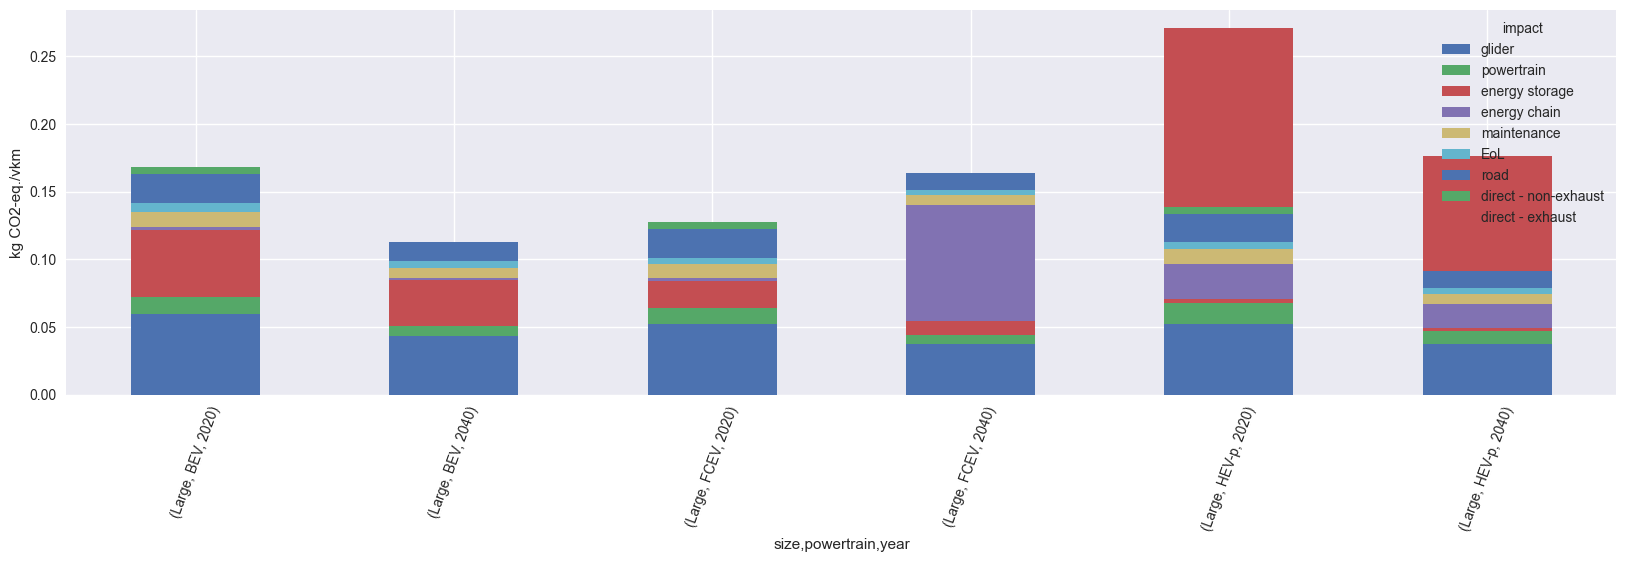

In [23]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()

scope = {
    'powertrain':['BEV', 'FCEV', 'HEV-p'],
    'size':['Large']
}

dcts, array = fill_xarray_from_input_parameters(cip, scope=scope)
array = array.interp(year=[2020, 2040],  kwargs={'fill_value': 'extrapolate'})

fuel_blend = {
          'cng':{ #specify fuel blend for compressed gas cars
                'primary':{
                    'type':'biogas - biowaste', 
                    'share':[0.9, 0.6] # shares per year. Must total 1 for each year.
                    },
                'secondary':{
                    'type':'syngas',
                    'share': [0.1, 0.4]
                    }
                },
         'petrol':{
                'primary':{
                    'type':'petrol', 
                    'share':[0.9, 0.6]
                    },
                'secondary':{
                    'type':'bioethanol - wheat straw',
                    'share': [0.1, 0.4]
                    }
                },
        'hydrogen':{
                'primary':{'type':'electrolysis', 'share':[1, 0]},
                'secondary':{'type':'smr - natural gas', 'share':[0, 1]}
                }
}

cm = CarModel(array, cycle='WLTC', fuel_blend=fuel_blend)
cm.set_all()

bc = {'custom electricity mix' : [
          [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], # in this case, 100% hydropower for the first year
          [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], # in this case, 100% nuclear for the second year
        ],
     }

ic = InventoryCar(cm, background_configuration = bc)
results = ic.calculate_impacts()

results.sel(impact_category='climate change', value=0).to_dataframe('val').unstack()["val"].plot(kind="bar", stacked=True, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

The fuel blends, the lower heating value of the fuels and the CO2 emission factor used can be accessed like so:

In [72]:
ic.fuel_blends

{'hydrogen': {'primary': {'type': 'electrolysis', 'share': [1, 0]},
  'secondary': {'type': 'smr - natural gas', 'share': [0, 1]}}}

# Sensitivity analysis

`carculator` has a function to claculate the sensitivity of characterized results in regard to the inputs parameters of `CarModel`. This function generates a number of "scenarios" within which one input parameter has its value increased by 10%. The newly calculated results are stored and compared to the reference scneario (where none of the input parameter values are modified).

To do so, we run the model in **static** mode, but we give the argument `sensitivity=True` to `fill_xarray_from_input_parameters()` and `calculate_impacts()`.

In [1]:
from carculator import *
import matplotlib.pyplot as plt
import numpy as np
cip = CarInputParameters()
cip.static()

_, array = fill_xarray_from_input_parameters(
    cip,
    sensitivity=True,
    scope={"size":["Large"], "powertrain":["BEV", "ICEV-d"], "year":[2020]}
)

cm = CarModel(array, cycle='WLTC')
cm.set_all()

ic = InventoryCar(cm)
res = ic.calculate_impacts(sensitivity=True)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2036, % of renewable: 78.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 5.0%
 * *********************************************************************


We retrieve an array that contains characterized results for a number of scenarios (where only one parameter value is increased in each scenario), normalized in regard to the reference scenario. Hence, values above 1 indicate that increasing the parameter value given in the `parameter` dimension of the array by 10% led to an increase in the characterized results (for the impact category selected).

We can turn the array into a `pandas` dataframe for better visualization. We can also remove the results that equal to 1 (which indicate that increasing the value of the selected parameter by 10% had no influence on the characterized result).

Let's see the result for a battery electric vehicle in 2017, in regard to the impact category **Climate change**.

Text(0.5, 1.0, 'Parameters value increased by 10%')

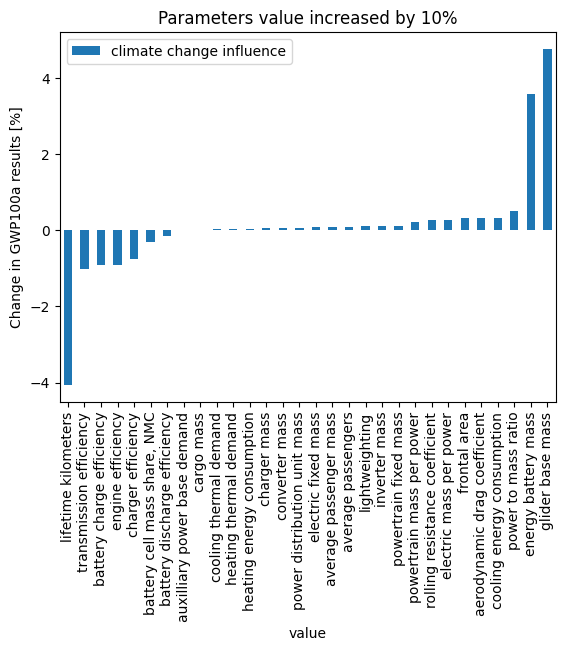

In [4]:
df = res.sel(impact_category="climate change", powertrain="BEV", size="Large", year=2020).to_dataframe("climate change influence")
df = df.loc[df["climate change influence"] != 1,:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y = "climate change influence", kind="bar")
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

Therefore, we can see that the characterized results for **Climate change** are negatively influenced by changes of +10% in the parameter value for the charge and discharge efficiency of the battery as well as the drivetrain and engine efficiency.

On the other end, the results are positively influenced by changes in the parameter value for the glider base mass, the mas s of the battery and the aerodynamic of the vehicle.

# Export inventories

Inventories in `static` calculation mode can be exported to different formats:
* as an Excel file compatible for import with `brightway2`
* a Brightway2 LCIImporter object
* a Python dictionary

## Export inventories without uncertainty 

Inventories are exported to an Excel file which can later be imported into `brightway2` or `Simapro`. The `export_to_excel()` function returns the filepath where the Excel file can be found (the same directory as the script calling it, or the directory you fill in using `directory`).

For Brightway2

In [7]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()

scope = {
    'powertrain':['ICEV-d', 'PHEV-p'],
}

dcts, array = fill_xarray_from_input_parameters(cip, scope=scope)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

ic = InventoryCar(cm)

ic.export_lci(
    software="brightway2",
    directory=r"/Users/romain/Documents",
    ecoinvent_version='3.8',
    format="file"
)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2000 and 2015, % of renewable: 60.0.
 	 * between 2010 and 2025, % of renewable: 68.0.
 	 * between 2020 and 2035, % of renewable: 77.0.
 	 * between 2030 and 2045, % of renewable: 85.0.
 	 * between 2040 and 2055, % of renewable: 88.0.
 	 * between 2050 and 2065, % of renewable: 88.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 5.0%
 	 * in 2030 _________________________________________ 5.0%
 	 * in 2040 _________________________________________ 5.0%
 	 * in 2050 _________________________________________ 5.0%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2000 ____________________________

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1549
Total time elapsed: 00:00:00


'/Users/romain/Documents/carculator_lci_bw2.xlsx'

For SimaPro

In [9]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()

scope = {
    'powertrain':['ICEV-d', 'PHEV-p'],
}

dcts, array = fill_xarray_from_input_parameters(cip, scope=scope)
cm = CarModel(array, cycle='WLTC')
cm.set_all()



ic = InventoryCar(cm)

ic.export_lci(
    software="simapro",
    directory=r"/Users/romain/Documents",
    ecoinvent_version='3.6'
)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2000 and 2015, % of renewable: 60.0.
 	 * between 2010 and 2025, % of renewable: 68.0.
 	 * between 2020 and 2035, % of renewable: 77.0.
 	 * between 2030 and 2045, % of renewable: 85.0.
 	 * between 2040 and 2055, % of renewable: 88.0.
 	 * between 2050 and 2065, % of renewable: 88.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 5.0%
 	 * in 2030 _________________________________________ 5.0%
 	 * in 2040 _________________________________________ 5.0%
 	 * in 2050 _________________________________________ 5.0%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2000 ____________________________

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1549
Total time elapsed: 00:00:00


'/Users/romain/Documents/carculator_lci_simapro.csv'

Here, the inventory is instead returned as a `brightway2` LCIImporter object, which can be directly registered into `brightway2`.

Currently, the inventories can be exported so as to link with **ecoinvent cut-off** 3.5, 3.6 3.7 and 3.8. The ecoinvent version can be specified in the `ecoinvent_version` argument. Here with ecoinvent 3.6:

In [10]:
i = ic.export_lci(ecoinvent_version='3.8', format="bw2io")

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1549
Total time elapsed: 00:00:00


In [13]:
import brightway2 as bw
bw.projects.set_current('new')

if "carculator export" in bw.databases:
    del bw.databases['carculator export']
    i.apply_strategies()

i.match_database(fields=('name', 'unit', 'location', 'reference product'))
i.match_database(fields=('name', 'unit', 'categories'))
i.match_database('ecoinvent 3.8 cutoff', fields=('name', 'unit', 'location', 'reference product'))
i.match_database("biosphere3", fields=('name', 'unit', 'categories'))

i.statistics()

if not list(i.unlinked):
    i.write_database()
else:
    i.add_unlinked_flows_to_biosphere_database()
    i.write_database()
    

Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
499 datasets
14616 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/03/2023 12:30:12
  Finished: 02/03/2023 12:30:13
  Total time elapsed: 00:00:00
  CPU %: 93.50
  Memory %: 2.91
Created database: carculator_lci_car


Once the export database registered, the user can perform LCAs, like so:

In [5]:
import brightway2 as bw
bw.projects.set_current('new')

In [15]:
FU = [{act:1} for act in bw.Database('carculator_lci_car') if 'transport, ' in act['name'] and 'Lower medium' in act['name']]
FU

[{'transport, car, diesel, Lower medium, 2020, Euro-6.2' (kilometer, CH, None): 1},
 {'transport, car, diesel, Lower medium, 2010, Euro-4' (kilometer, CH, None): 1},
 {'transport, car, plugin gasoline hybrid, Lower medium, 2050, Euro-7' (kilometer, CH, None): 1},
 {'transport, car, diesel, Lower medium, 2030, Euro-7' (kilometer, CH, None): 1},
 {'transport, car, plugin gasoline hybrid, Lower medium, 2020, Euro-6.2' (kilometer, CH, None): 1},
 {'transport, car, plugin gasoline hybrid, Lower medium, 2040, Euro-7' (kilometer, CH, None): 1},
 {'transport, car, diesel, Lower medium, 2000, Euro-2' (kilometer, CH, None): 1},
 {'transport, car, diesel, Lower medium, 2040, Euro-7' (kilometer, CH, None): 1},
 {'transport, car, diesel, Lower medium, 2050, Euro-7' (kilometer, CH, None): 1},
 {'transport, car, plugin gasoline hybrid, Lower medium, 2030, Euro-7' (kilometer, CH, None): 1}]

In [16]:
import pandas as pd
bw.calculation_setups['multiLCA'] = {'inv': FU, 'ia': [('IPCC 2013', 'climate change', 'GWP 100a')]}
myMultiLCA = bw.MultiLCA('multiLCA')
df_impact = pd.DataFrame(columns = [('IPCC 2013', 'climate change', 'GWP 100a')],
                         data = myMultiLCA.results,
                         index=[(k['name'], k['location'], k["database"]) for i in FU for k in i])

df_impact.head()

,"(IPCC 2013, climate change, GWP 100a)"
"(transport, car, diesel, Lower medium, 2020, Euro-6.2, CH, carculator_lci_car)",0.249001
"(transport, car, diesel, Lower medium, 2010, Euro-4, CH, carculator_lci_car)",0.274288
"(transport, car, plugin gasoline hybrid, Lower medium, 2050, Euro-7, CH, carculator_lci_car)",0.145473
"(transport, car, diesel, Lower medium, 2030, Euro-7, CH, carculator_lci_car)",0.226964
"(transport, car, plugin gasoline hybrid, Lower medium, 2020, Euro-6.2, CH, carculator_lci_car)",0.222947
